In [1]:
%pip install numpy
%pip install pandas
%pip install matplotlib
%pip install seaborn
%pip install optuna
%pip install xgboost
%pip install lightgbm
%pip install catboost

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv("passengers_sample_15k.csv")

Gender: Пол пассажиров (Female, Male)

Customer Type: Тип клиента (Loyal customer, disloyal customer)

Age: Фактический возраст пассажиров

Type of Travel: Цель полета пассажиров (Personal Travel, Business Travel)

Class: Класс путешествия (Business, Eco, Eco Plus)

Flight distance: Дальность полета в этом путешествии

Inflight wifi service: Уровень удовлетворенности услугами Wi-Fi на борту (0:Not Applicable;1-5)

Departure/Arrival time convenient: Уровень удовлетворенности удобным временем отправления/прибытия

Ease of Online booking: Уровень удовлетворенности онлайн-бронированием

Gate location: Уровень удовлетворенности расположением ворот

Food and drink: Уровень удовлетворенности едой и напитками

Online boarding: Уровень удовлетворенности онлайн-посадкой

Seat comfort: Уровень удовлетворенности комфортом сиденья

Inflight entertainment: Уровень удовлетворенности развлечениями на борту

On-board service: Уровень удовлетворенности бортовым сервисом

Leg room service: Уровень удовлетворенности местом для ног

Baggage handling: Уровень удовлетворенности обработкой багажа

Check-in service:Уровень удовлетворенности услугой регистрации

Inflight service: Уровень удовлетворенности обслуживанием на борту

Cleanliness: Уровень удовлетворенности чистотой

Departure Delay in Minutes: Минуты задержки при вылете

Arrival Delay in Minutes: Задержка в минутах по прибытии

Satisfaction: Уровень удовлетворенности авиакомпаний(Satisfaction, neutral or dissatisfaction)

In [4]:
pd.set_option('display.max_columns', None)
df.head()

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,60945,Male,Loyal Customer,53,Business travel,Business,888,1,5,5,5,3,4,3,1,1,1,1,4,1,3,33,45.0,neutral or dissatisfied
1,128215,Male,Loyal Customer,34,Business travel,Business,1672,2,2,2,2,4,4,4,4,4,4,4,3,4,4,0,0.0,satisfied
2,69238,Female,Loyal Customer,47,Business travel,Business,733,2,1,1,1,3,4,4,2,2,2,2,2,2,3,0,0.0,neutral or dissatisfied
3,70174,Female,Loyal Customer,42,Business travel,Business,258,0,0,0,3,4,5,4,3,2,4,4,4,3,4,183,187.0,satisfied
4,113872,Female,Loyal Customer,52,Personal Travel,Eco,1489,3,3,3,4,4,3,3,4,4,3,4,2,4,3,23,11.0,neutral or dissatisfied


In [5]:
df.shape

(15000, 24)

In [6]:
for col in df.columns:
    print(col)
    print(df[col].unique())
    print('-'*100)

id
[ 60945 128215  69238 ...  26791  14603  59621]
----------------------------------------------------------------------------------------------------
Gender
['Male' 'Female']
----------------------------------------------------------------------------------------------------
Customer Type
['Loyal Customer' 'disloyal Customer']
----------------------------------------------------------------------------------------------------
Age
[53 34 47 42 52 21 35 55 39 30 50  8 33 19 36 44 58 54 24 41 22 29 40 38
 48 67 31 45 27 26 23 17 25 46 43 61 65 28 18 60 12  9 10 32 37 57 64 49
 63 13 11 69 59 62 51 56 20 72 71 15 16 66 70 75 68 77 76  7 14 80 78 73
 79 74 85]
----------------------------------------------------------------------------------------------------
Type of Travel
['Business travel' 'Personal Travel']
----------------------------------------------------------------------------------------------------
Class
['Business' 'Eco' 'Eco Plus']
-------------------------------------------

In [7]:
df.isnull().sum()

id                                    0
Gender                                0
Customer Type                         0
Age                                   0
Type of Travel                        0
Class                                 0
Flight Distance                       0
Inflight wifi service                 0
Departure/Arrival time convenient     0
Ease of Online booking                0
Gate location                         0
Food and drink                        0
Online boarding                       0
Seat comfort                          0
Inflight entertainment                0
On-board service                      0
Leg room service                      0
Baggage handling                      0
Checkin service                       0
Inflight service                      0
Cleanliness                           0
Departure Delay in Minutes            0
Arrival Delay in Minutes             35
satisfaction                          0
dtype: int64

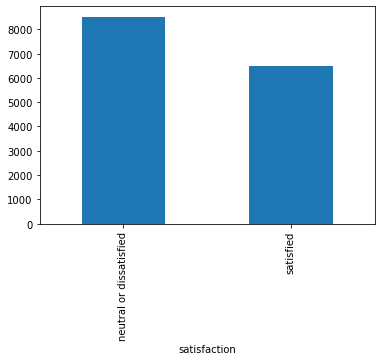

In [8]:
df.satisfaction.value_counts().plot.bar()

## Преобразование данных и подготовка тренировочных данных

In [9]:
# В колонке Arrival Delay in Minutes есть пропущенные данные
df["Arrival Delay in Minutes"].fillna(df["Arrival Delay in Minutes"].mean(), inplace=True)

In [10]:
df['satisfaction'].replace(['satisfied', 'neutral or dissatisfied'], [1, 0], inplace=True)

In [11]:
from sklearn.preprocessing import LabelEncoder  
le = LabelEncoder()

# Заменю на категории, чтобы получить корреляционную матрицу
df['Customer Type'] = le.fit_transform(df['Customer Type'])
df['Gender'] = le.fit_transform(df['Gender'])
df['Type of Travel'] = le.fit_transform(df['Gender'])
df['Class'] = le.fit_transform(df['Gender'])

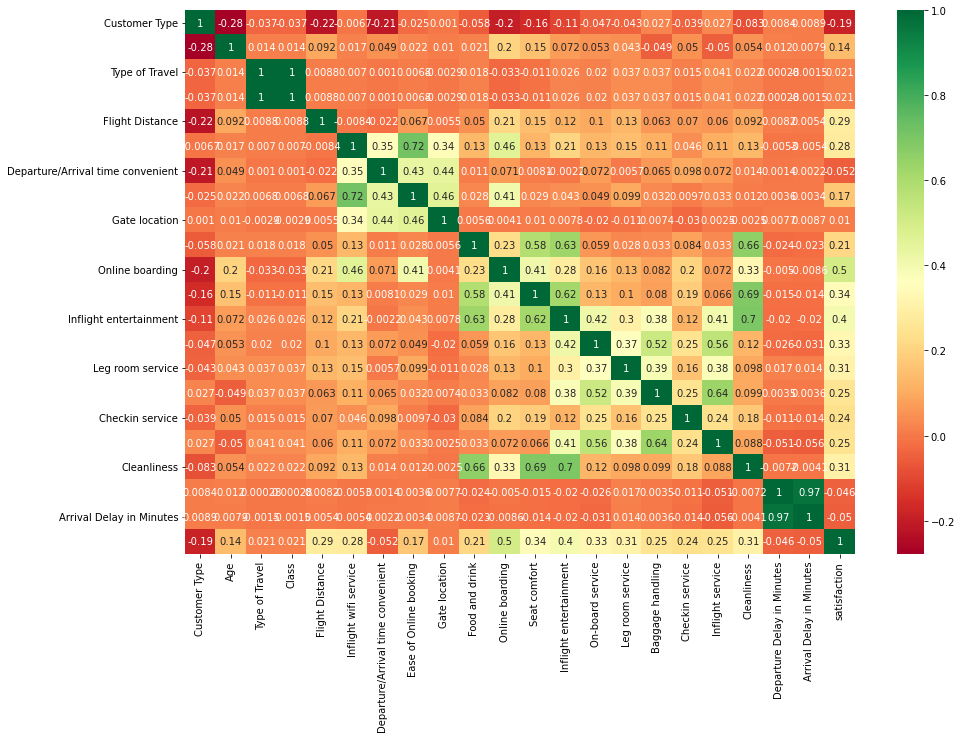

In [12]:
sns.heatmap(df.drop(['id', 'Gender'], axis=1).corr(), annot=True, cmap='RdYlGn')
fig = plt.gcf()
fig.set_size_inches(15, 10)

Видимо, онлайн бронирование сильно влияет на удовлетворенность авиакомпанией, так же коррелируют признаки, которые присутствуют у дорогих авиакомпаний и отсутсвуют у лоукостеров

In [13]:
num_attrs = ['Age', 'Flight Distance', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']
cat_attrs = ['Gender', 'Customer Type', 'Type of Travel', 'Class', 'Inflight wifi service', 
             'Departure/Arrival time convenient', 'Ease of Online booking',
             'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
             'Inflight entertainment', 'On-board service', 'Leg room service',
             'Baggage handling', 'Checkin service', 'Inflight service',
             'Cleanliness']

num_df = df[num_attrs]
cat_df = df[cat_attrs]

In [14]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

pipeline = ColumnTransformer([
    ('num', StandardScaler(), num_attrs),
    ('cat', OneHotEncoder(), cat_attrs)
])
satisfaction = df['satisfaction']
df = pipeline.fit_transform(df)

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df, satisfaction, test_size=0.3, random_state=123)

## Model Training

In [16]:
from sklearn.model_selection import KFold
from optuna.integration import OptunaSearchCV
from sklearn.model_selection import cross_validate
from statistics import mean 

def cross_train(classifier, param_grid, X_train, y_train):
    model = OptunaSearchCV(
        classifier,
        param_grid,
        scoring="f1"
    )

    cv_results = cross_validate(
        model,
        X_train,
        y_train,
        scoring=["f1", "roc_auc"],
        cv=KFold(shuffle=True, n_splits=5),
        return_estimator=True,
        return_train_score=True,
        n_jobs=3
    )
    
    classifiers = cv_results["estimator"]
    return cv_results["estimator"], mean(cv_results["fit_time"])


def get_result_of_n_classifiers(classifiers, X):
    predictions = [classifier.predict(X) for classifier in classifiers]
    majority_votes = np.apply_along_axis(lambda x: np.bincount(x).argmax(), axis=0, arr=predictions)
    return majority_votes

In [17]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import f1_score, precision_score, recall_score, roc_auc_score

models_f1_score = dict()
models_accuracy = dict()
model_fit_time = dict()
model_predict_time = dict()

def add_statistics(name, f1, accuracy, fit_time, predict_time):
    print(f"Got for {name} roc_auc:{accuracy}, f1:{f1}")
    models_f1_score[name] = f1
    models_accuracy[name] = accuracy
    model_fit_time[name] = fit_time
    model_predict_time[name] = predict_time

In [18]:
import time
from optuna.distributions import CategoricalDistribution


def train_and_add_results(cls, name, param_grid, to_array = False, custom = False):
    print(f"Fit {name}")
    fit_time = None
    start_fit = time.time()
    if custom:
        cls.fit(X_train, y_train)
    else:
        classifiers, fit_time = cross_train(cls, param_grid, X_train if not to_array else X_train.toarray(), y_train)
    # Если используем кросс-валидацию, то возьмем среднее время обучения одной модели, 
    # так как из-за ограничений по времени она используется не везде
    if not fit_time: 
        fit_time = time.time() - start_fit
    start_predict = time.time()
    print(f"Getting predictions for {name}")
    if custom:
        pred = cls.predict(X_test)
    else:
        pred = get_result_of_n_classifiers(classifiers, X_test.toarray() if to_array else X_test)
    end_predict = time.time()
    add_statistics(name, f1_score(y_test, pred), roc_auc_score(y_test, pred), fit_time, end_predict - start_predict)

Сравним для начала все алгоритмы из библиотек

In [19]:
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, \
                                GradientBoostingClassifier, HistGradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier

models_to_compare = {
    "AdaBoostClassifier": {
        "cls": AdaBoostClassifier(),
        "param_grid": {'n_estimators': CategoricalDistribution([50, 100])}
    },
    "RandomForestClassifier": {
        "cls": RandomForestClassifier(),
        "param_grid": {'n_estimators': CategoricalDistribution([50, 100])}
    },
    "BaggingClassifier": {
        "cls": BaggingClassifier(DecisionTreeClassifier(), random_state=10),
        "param_grid": {'n_estimators': CategoricalDistribution([10, 100])}
    },
    "GradientBoostingClassifier": {
        "cls": GradientBoostingClassifier(random_state=10),
        "param_grid": {'max_depth': CategoricalDistribution([5, 10])}
    }
}
for name, val in models_to_compare.items():
    train_and_add_results(val["cls"], name, val["param_grid"])

Fit AdaBoostClassifier
Getting predictions for AdaBoostClassifier
Got for AdaBoostClassifier roc_auc:0.8944455181578598, f1:0.8799788973885517
Fit RandomForestClassifier
Getting predictions for RandomForestClassifier
Got for RandomForestClassifier roc_auc:0.9272883514365445, f1:0.9182058047493403
Fit BaggingClassifier
Getting predictions for BaggingClassifier
Got for BaggingClassifier roc_auc:0.923603152028482, f1:0.9141494435612083
Fit GradientBoostingClassifier
Getting predictions for GradientBoostingClassifier
Got for GradientBoostingClassifier roc_auc:0.9344827127549696, f1:0.926738957947633


In [20]:
import xgboost as xgb
import lightgbm as lgb
import catboost as cb

train_and_add_results(xgb.XGBClassifier(), 'XGBC', {}, custom = True) 
train_and_add_results(lgb.LGBMClassifier(), 'LGBM', {}, custom = True) 
train_and_add_results(cb.CatBoostClassifier(), 'CatBoostClassifier', {}, custom = True) 

Fit XGBC
Getting predictions for XGBC
Got for XGBC roc_auc:0.9364148930746022, f1:0.928533893851813
Fit LGBM
[LightGBM] [Info] Number of positive: 4543, number of negative: 5957
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000488 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 853
[LightGBM] [Info] Number of data points in the train set: 10500, number of used features: 87
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.432667 -> initscore=-0.270979
[LightGBM] [Info] Start training from score -0.270979
Getting predictions for LGBM
Got for LGBM roc_auc:0.9352524611493203, f1:0.9273301737756714
Fit CatBoostClassifier
Learning rate set to 0.028118
0:	learn: 0.6637318	total: 154ms	remaining: 2m 33s
1:	learn: 0.6366785	total: 174ms	remaining: 1m 26s
2:	learn: 0.6117674	total: 192ms	remaining: 1m 3s
3:	learn: 0.5891416	total: 207ms	remain

153:	learn: 0.1790074	total: 1.42s	remaining: 7.81s
154:	learn: 0.1783473	total: 1.43s	remaining: 7.79s
155:	learn: 0.1781987	total: 1.44s	remaining: 7.78s
156:	learn: 0.1779336	total: 1.45s	remaining: 7.77s
157:	learn: 0.1777246	total: 1.46s	remaining: 7.76s
158:	learn: 0.1771596	total: 1.46s	remaining: 7.75s
159:	learn: 0.1767906	total: 1.47s	remaining: 7.73s
160:	learn: 0.1758400	total: 1.48s	remaining: 7.72s
161:	learn: 0.1755943	total: 1.49s	remaining: 7.71s
162:	learn: 0.1753530	total: 1.5s	remaining: 7.69s
163:	learn: 0.1744571	total: 1.51s	remaining: 7.68s
164:	learn: 0.1735870	total: 1.52s	remaining: 7.67s
165:	learn: 0.1730361	total: 1.52s	remaining: 7.66s
166:	learn: 0.1727393	total: 1.54s	remaining: 7.66s
167:	learn: 0.1722265	total: 1.54s	remaining: 7.65s
168:	learn: 0.1719526	total: 1.55s	remaining: 7.64s
169:	learn: 0.1715374	total: 1.56s	remaining: 7.62s
170:	learn: 0.1713507	total: 1.57s	remaining: 7.61s
171:	learn: 0.1706397	total: 1.58s	remaining: 7.61s
172:	learn: 0

319:	learn: 0.1320879	total: 3.53s	remaining: 7.49s
320:	learn: 0.1319493	total: 3.54s	remaining: 7.48s
321:	learn: 0.1317401	total: 3.55s	remaining: 7.47s
322:	learn: 0.1315790	total: 3.56s	remaining: 7.46s
323:	learn: 0.1314241	total: 3.57s	remaining: 7.45s
324:	learn: 0.1312889	total: 3.58s	remaining: 7.44s
325:	learn: 0.1311222	total: 3.6s	remaining: 7.44s
326:	learn: 0.1310472	total: 3.61s	remaining: 7.43s
327:	learn: 0.1309575	total: 3.62s	remaining: 7.42s
328:	learn: 0.1307880	total: 3.63s	remaining: 7.41s
329:	learn: 0.1306364	total: 3.65s	remaining: 7.41s
330:	learn: 0.1303302	total: 3.67s	remaining: 7.41s
331:	learn: 0.1302154	total: 3.68s	remaining: 7.41s
332:	learn: 0.1300380	total: 3.71s	remaining: 7.43s
333:	learn: 0.1299801	total: 3.72s	remaining: 7.42s
334:	learn: 0.1298123	total: 3.73s	remaining: 7.41s
335:	learn: 0.1297638	total: 3.74s	remaining: 7.4s
336:	learn: 0.1295742	total: 3.75s	remaining: 7.38s
337:	learn: 0.1293600	total: 3.76s	remaining: 7.37s
338:	learn: 0.

492:	learn: 0.1100118	total: 5.15s	remaining: 5.3s
493:	learn: 0.1098979	total: 5.16s	remaining: 5.29s
494:	learn: 0.1098780	total: 5.17s	remaining: 5.27s
495:	learn: 0.1096979	total: 5.18s	remaining: 5.26s
496:	learn: 0.1095017	total: 5.18s	remaining: 5.25s
497:	learn: 0.1093464	total: 5.19s	remaining: 5.23s
498:	learn: 0.1092978	total: 5.2s	remaining: 5.22s
499:	learn: 0.1092798	total: 5.2s	remaining: 5.2s
500:	learn: 0.1091860	total: 5.21s	remaining: 5.19s
501:	learn: 0.1091043	total: 5.22s	remaining: 5.18s
502:	learn: 0.1089423	total: 5.22s	remaining: 5.16s
503:	learn: 0.1087589	total: 5.23s	remaining: 5.15s
504:	learn: 0.1085262	total: 5.24s	remaining: 5.14s
505:	learn: 0.1083860	total: 5.25s	remaining: 5.12s
506:	learn: 0.1083503	total: 5.25s	remaining: 5.11s
507:	learn: 0.1083333	total: 5.26s	remaining: 5.09s
508:	learn: 0.1082044	total: 5.27s	remaining: 5.08s
509:	learn: 0.1080946	total: 5.28s	remaining: 5.07s
510:	learn: 0.1080757	total: 5.28s	remaining: 5.05s
511:	learn: 0.10

662:	learn: 0.0936030	total: 6.62s	remaining: 3.36s
663:	learn: 0.0935564	total: 6.63s	remaining: 3.35s
664:	learn: 0.0934300	total: 6.64s	remaining: 3.34s
665:	learn: 0.0933314	total: 6.65s	remaining: 3.33s
666:	learn: 0.0932780	total: 6.66s	remaining: 3.32s
667:	learn: 0.0932343	total: 6.67s	remaining: 3.31s
668:	learn: 0.0931299	total: 6.68s	remaining: 3.3s
669:	learn: 0.0930621	total: 6.69s	remaining: 3.29s
670:	learn: 0.0930107	total: 6.7s	remaining: 3.28s
671:	learn: 0.0929623	total: 6.71s	remaining: 3.27s
672:	learn: 0.0928167	total: 6.72s	remaining: 3.26s
673:	learn: 0.0927389	total: 6.72s	remaining: 3.25s
674:	learn: 0.0926332	total: 6.73s	remaining: 3.24s
675:	learn: 0.0925034	total: 6.74s	remaining: 3.23s
676:	learn: 0.0924036	total: 6.75s	remaining: 3.22s
677:	learn: 0.0922875	total: 6.76s	remaining: 3.21s
678:	learn: 0.0921825	total: 6.77s	remaining: 3.2s
679:	learn: 0.0921624	total: 6.78s	remaining: 3.19s
680:	learn: 0.0920842	total: 6.79s	remaining: 3.18s
681:	learn: 0.0

830:	learn: 0.0806530	total: 8.31s	remaining: 1.69s
831:	learn: 0.0805992	total: 8.32s	remaining: 1.68s
832:	learn: 0.0805106	total: 8.33s	remaining: 1.67s
833:	learn: 0.0804109	total: 8.34s	remaining: 1.66s
834:	learn: 0.0803523	total: 8.35s	remaining: 1.65s
835:	learn: 0.0803075	total: 8.36s	remaining: 1.64s
836:	learn: 0.0802824	total: 8.36s	remaining: 1.63s
837:	learn: 0.0801701	total: 8.37s	remaining: 1.62s
838:	learn: 0.0800549	total: 8.38s	remaining: 1.61s
839:	learn: 0.0799822	total: 8.39s	remaining: 1.6s
840:	learn: 0.0799087	total: 8.4s	remaining: 1.59s
841:	learn: 0.0798354	total: 8.4s	remaining: 1.58s
842:	learn: 0.0797637	total: 8.41s	remaining: 1.57s
843:	learn: 0.0796819	total: 8.42s	remaining: 1.56s
844:	learn: 0.0795996	total: 8.43s	remaining: 1.55s
845:	learn: 0.0794718	total: 8.44s	remaining: 1.54s
846:	learn: 0.0794019	total: 8.45s	remaining: 1.53s
847:	learn: 0.0793260	total: 8.46s	remaining: 1.52s
848:	learn: 0.0792409	total: 8.47s	remaining: 1.5s
849:	learn: 0.07

In [21]:
from sklearn.ensemble import HistGradientBoostingClassifier
train_and_add_results(HistGradientBoostingClassifier(random_state=10, max_depth=50), 'HGBR', {}, to_array = True)

Fit HGBR
Getting predictions for HGBR
Got for HGBR roc_auc:0.9348660250853938, f1:0.9269707355655155


## My Bagging Classifier

In [22]:
import copy
from sklearn.utils import resample

class BaggingClassifier:
    def __init__(self, classifier_class, n_estimators=50):
        self.classifier_class = classifier_class
        self.n_estimators = n_estimators
        self.classifiers = []

    def fit(self, X, y):
        for _ in range(self.n_estimators):
            classifier = self.classifier_class.__class__()
            X_r, y_r = resample(X, y) # выборка с возвращением
            classifier.fit(X_r, y_r)
            self.classifiers.append(classifier)

    def predict(self, X):
        preds = [classifier.predict(X) for classifier in self.classifiers]
        majority_votes = np.apply_along_axis(lambda x: np.bincount(x).argmax(), axis=0, arr=preds)
        return majority_votes

In [23]:
train_and_add_results(BaggingClassifier(DecisionTreeClassifier()), 'MyBaggingClassifier', {"n_estimators": CategoricalDistribution([50, 100])}, custom = True)

Fit MyBaggingClassifier
Getting predictions for MyBaggingClassifier
Got for MyBaggingClassifier roc_auc:0.9196467923992914, f1:0.9093791281373844


## MyAdaBoost

In [24]:
class AdaBoost:

    def __init__(self, n_estimators = 100):
        self.weak_classifiers = []
        self.coeffs = []
        self.sample_weights = []
        self.n_estimators = n_estimators

    def fit(self, X, y):
        n = len(y)
        self.sample_weights = np.zeros(shape=(self.n_estimators, n))
        curr_sample_weights = np.ones(shape=n) / n

        for t in range(self.n_estimators):
            stump = DecisionTreeClassifier(max_depth=1, max_leaf_nodes=2) #Решающий пень
            stump = stump.fit(X, y, sample_weight=curr_sample_weights)

            predictions = stump.predict(X)
            err = curr_sample_weights[(predictions != y)].sum() / n
            stump_weight = np.log((1 - err) / err) / 2

            new_sample_weights = curr_sample_weights * np.exp(-stump_weight * y * predictions)

            curr_sample_weights = new_sample_weights/new_sample_weights.sum()
            self.weak_classifiers.append(stump)
            self.coeffs.append(stump_weight)
        return self

    def predict(self, X):
        return np.sign(np.dot(self.coeffs, np.array([classifier.predict(X) for classifier in self.weak_classifiers])))

In [25]:
train_and_add_results(AdaBoost(), 'MyAdaClassifier', {}, custom=True)

Fit MyAdaClassifier
Getting predictions for MyAdaClassifier
Got for MyAdaClassifier roc_auc:0.8270530839210152, f1:0.808132741294695


## Display Results

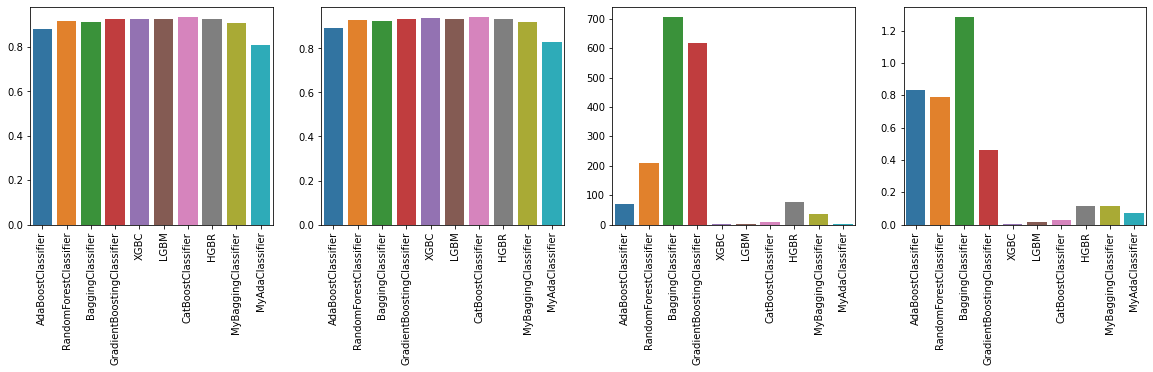

In [26]:
statistics = [models_f1_score, models_accuracy, model_fit_time, model_predict_time]
statistics

fig, axs = plt.subplots(ncols=4, figsize=(20, 4))
for ay, ax in zip(statistics, axs.flatten()):
    sns.barplot(x=list(ay.keys()), y=list(ay.values()), ax=ax)
    ax.tick_params(axis="x", rotation=90)
    ax.set_xlabel(None)

plt.show()

Слева на право представлены графики: f1, roc_auc, время обучения модели, время предсказания

В результате все модели показали себя примерно одинаково. Своя AdaBoost сработала немного хуже. 
Лучше всех показал себя CatBoostClassificator.